# Import Pandas and Load the Data 

In [1]:
# Importing modules
import pandas as pd# Read data into df
df = pd.read_csv("C:/Users/saimi/Downloads/IMDB Dataset.csv (1)/IMDB Dataset.csv") # eclipse_jdk.csv
df.head()

C:\Users\saimi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Clean the data using regex

In [2]:
import html
import re
def clean(text):# convert html escapes like & to characters.
    text = html.unescape(text)# tags like
    text = re.sub(r'<[^<>]*>', ' ', text)# markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)# text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)# standalone sequences of specials, matches but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)# standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)# sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Data Cleaning

In [3]:
df['cleaned_text'] = df['review'].apply(clean)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        50000 non-null  object
 1   sentiment     50000 non-null  object
 2   cleaned_text  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


# Train Test Split 

In [4]:
from sklearn.model_selection import train_test_split

# Assuming you've added a 'sentiment' column after processing for sentiment analysis
X_train, X_test, Y_train, Y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])


In [5]:
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  40000
Size of Test Data  10000


# Taining the Model using SVM

In [6]:
# Convert X Train to numbers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2),stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

# Building the model

In [7]:
from sklearn.svm import LinearSVC
model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf,Y_train)

C:\Users\saimi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

# Testing the model and Accuracy 

In [8]:
from sklearn.metrics import accuracy_score
Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test,Y_pred))

Accuracy Score -  0.906


# Dummy Running

In [9]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train,Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test,Y_pred_baseline))

Accuracy Score -  0.5


# Print Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test,Y_pred)

array([[4491,  509],
       [ 431, 4569]], dtype=int64)

# Install SKlearn

In [11]:
pip install  scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Confusion matrix Visualisation

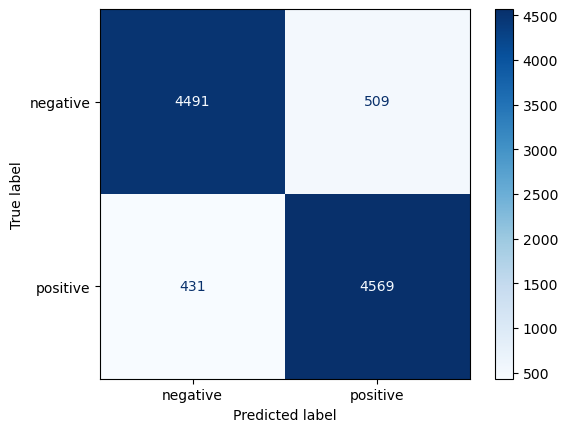

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have a trained model named 'model1' and test data 'X_test_tf' and 'Y_test'
ConfusionMatrixDisplay.from_estimator(model1, X_test_tf, Y_test, values_format='d', cmap=plt.cm.Blues)
plt.show()


# Classification Report

In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.90      0.91      5000
    positive       0.90      0.91      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [14]:
# Downsample the 'positive' sentiment
df_samplePositive = df[df['sentiment'] == 'positive'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other sentiments
df_sampleRest = df[df['sentiment'] != 'positive']

# Concatenate the two dataframes to create the new balanced dataset
df_balanced = pd.concat([df_sampleRest, df_samplePositive])

# Check the status of the class distribution
print(df_balanced['sentiment'].value_counts())

sentiment
negative    25000
positive     4000
Name: count, dtype: int64


In [15]:
df_balanced['cleaned_text'] = df_balanced['review'].apply(clean)

from sklearn.model_selection import train_test_split

# Assuming you've added a 'sentiment' column after processing for sentiment analysis
X_train, X_test, Y_train, Y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Convert X Train to numbers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2),stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)
from sklearn.svm import LinearSVC
model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf,Y_train)
from sklearn.metrics import accuracy_score
Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test,Y_pred))
from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
print(classification_report(Y_test,Y_pred))

Size of Training Data  40000
Size of Test Data  10000


C:\Users\saimi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score -  0.906
              precision    recall  f1-score   support

    negative       0.91      0.90      0.91      5000
    positive       0.90      0.91      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import LinearSVC

# Assuming 'clean' is a predefined function for text cleaning
# If not, you need to define this or ensure 'cleaned_text' is already processed

# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True

# Sample data loading step (replace this with your actual DataFrame)
# df = your_dataframe

# Assume df is already loaded and has columns 'review', 'sentiment', and 'cleaned_text'
df = df.dropna(subset=['cleaned_text', 'sentiment'])  # Drop rows where these important columns are NA
df = df[df['cleaned_text'].str.len() > 50]  # Filter rows where 'cleaned_text' is longer than 50 characters

if runSVC:
    # Sample the data when running SVC to ensure reasonable run-times
    # This is done per 'sentiment' group to maintain the distribution of sentiments
    df = df.groupby('sentiment', as_index=False).apply(pd.DataFrame.sample, random_state=42, frac=.2).reset_index(drop=True)

# Train-Test Split
# Here, 'cleaned_text' is used as the input feature and 'sentiment' as the label
X_train, X_test, Y_train, Y_test = train_test_split(
    df['cleaned_text'],
    df['sentiment'],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment']  # This ensures the train-test split has a similar distribution of sentiments
)

print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])


Size of Training Data  7999
Size of Test Data  2000


C:\Users\saimi\AppData\Local\Temp\ipykernel_25860\2433367593.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('sentiment', as_index=False).apply(pd.DataFrame.sample, random_state=42, frac=.2).reset_index(drop=True)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Assuming runSVC flag is defined as before
runSVC = True  # or False, depending on whether you want to run SVC or LinearSVC

# Define the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Choose the model and define the grid search parameters
if runSVC:
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }]

# Set up the training pipeline
training_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', model)
])

# Configure the grid search
gridSearchProcessor = GridSearchCV(
    estimator=training_pipeline,
    param_grid=grid_param,
    cv=5
)

# Fit the model
gridSearchProcessor.fit(X_train, Y_train)

# Retrieve the best parameters and results
best_params = gridSearchProcessor.best_params_
print("Best parameters identified by grid search:", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search:", best_result)

# Get the best model
best_model = gridSearchProcessor.best_estimator_


Best parameters identified by grid search: {'model__C': 1, 'model__kernel': 'linear', 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 6)}
Best result identified by grid search: 0.8698593652282677


In [18]:
# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy Score -  0.871
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      1000
    positive       0.87      0.88      0.87      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

